Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4473s
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4460s
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.4645s
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.7019s


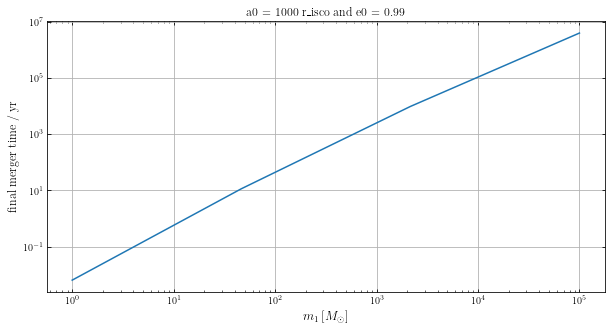

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from numpy import diff

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of yr
M_solar = 1.989e30




e0= 0.99

r_spike = 1  # in parsecs, Choosen by choic
    
alpha = 9/4
 
D_luminosity = 5e8              # The distance to the system from earth as 500 Mpc
        
m1_list = np.geomspace(1, 1e5, 4)  # in units of solar mass

m2 = 1e-3 *  ms.solar_mass_to_pc


    

plt.figure(figsize = (10, 5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

t_m_list = np.zeros(len(m1_list))

for i, (m_1) in enumerate (m1_list):
    
    m_bar = m_1
    
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))
    
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
 
    m1 = m1_list[i]* ms.solar_mass_to_pc
    
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)

    a0= 1000 * sp.r_isco()

    a_fin = sp.r_isco()      # Choosen equal to r_icso

    R_fin = sp.r_isco()      # The final condition for the evolution

    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e0,  a_fin = R_fin)
    
    t_m_list[i] = ev_ecc.t[-1]/ms.year_to_pc
    
plt.loglog(m1_list, t_m_list, '')
    

    
    

plt.xlabel('$m_{1} \, [M_{\odot}]$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('a0 = 1000 r_isco and e0 = 0.99')
plt.grid()
plt.savefig('t_m vs m1.pdf', bbox_inches='tight')
plt.show()